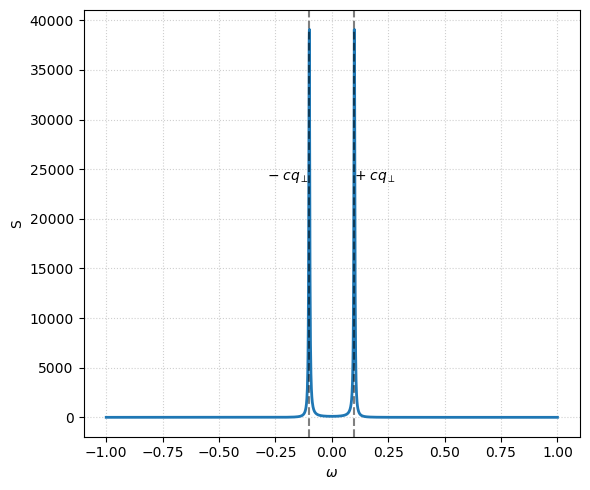

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters (choose illustrative values) ---
Delta = 1.0      # noise amplitude
rho0  = 1.0      # mean density
c     = 1.0      # sound speed
Dperp = 0.5      # transverse diffusion (bare or "linear" value)
Dpar  = 0.2      # parallel diffusion

# Choose a fixed q
q_perp = 0.1     # small transverse wavenumber
q_par  = 0.0     # set to zero for simplicity

# Frequency grid
omega = np.linspace(-1.0, 1.0, 2000)

# For now, use a simple (linear) D_perp^R = Dperp (no anomalous scaling)
Dperp_R = Dperp

# Denominator pieces
resonance = (omega**2 - (c*q_perp)**2)**2
damping   = omega**2 * (Dperp_R * q_perp**2 + Dpar * q_par**2)**2

S = (Delta * q_perp**2 * rho0**2) / (resonance + damping)

plt.figure(figsize=(6,5))
plt.plot(omega, S, lw=2)

# Mark expected peak positions at +- c q_perp
plt.axvline(c*q_perp,  color='k', ls='--', alpha=0.5)
plt.axvline(-c*q_perp, color='k', ls='--', alpha=0.5)
plt.text(c*q_perp,  max(S)*0.6,  r'$+\;c q_\perp$', ha='left', va='bottom')
plt.text(-c*q_perp, max(S)*0.6,  r'$-\;c q_\perp$', ha='right', va='bottom')

plt.xlabel(r'$\omega$')
plt.ylabel('S')
# plt.title(r'Density-Density correlation $q_\perp=%.2f$' % q_perp)
plt.grid(True, ls=':', alpha=0.6)
plt.tight_layout()
plt.savefig("density-density_correlation")
plt.show()


<unknown>:35: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<ipython-input-6-6d3cd7c04fa5>:35: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Scaling Collapse of $D_\perp^R$ (Toner–Tu Expectation)')


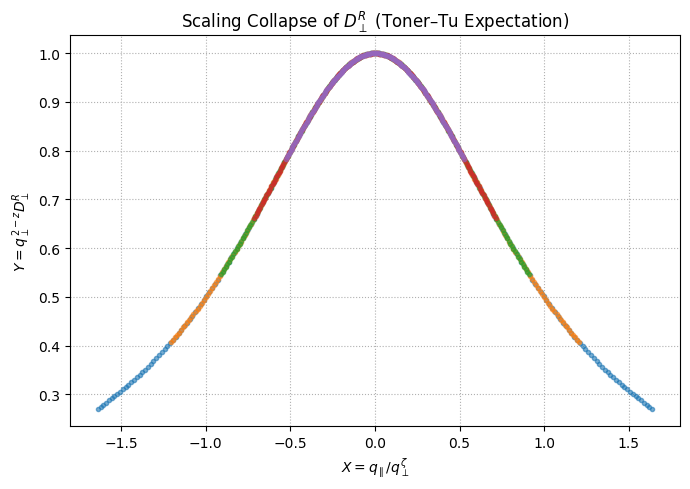

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Exponents (2D Toner–Tu)
z = 6/5
zeta = 3/5

# Define a synthetic scaling function f(X)
def f_scaling(X):
    return 1 / (1 + X**2)

# Generate multiple q_perp values
qperp_vals = np.array([0.03, 0.05, 0.08, 0.12, 0.2])

data_X = []
data_Y = []

for qperp in qperp_vals:
    qpar = np.linspace(-0.2, 0.2, 200)
    X = qpar / (qperp**zeta)
    D_R = qperp**(z - 2) * f_scaling(X)
    
    Y = qperp**(2 - z) * D_R   # this should collapse to f(X)
    
    data_X.append(X)
    data_Y.append(Y)

# Plot
plt.figure(figsize=(7,5))
for X, Y in zip(data_X, data_Y):
    plt.plot(X, Y, '.', alpha=0.6)

plt.xlabel(r'$X = q_\parallel / q_\perp^\zeta$')
plt.ylabel(r'$Y = q_\perp^{\,2-z} D_\perp^R$')
plt.title('Scaling Collapse of $D_\perp^R$ (Toner–Tu Expectation)')
plt.grid(True, ls=':')
plt.tight_layout()
# plt.savefig("scaling_collapse_DperpR.png", dpi=300, bbox_inches='tight')
plt.show()


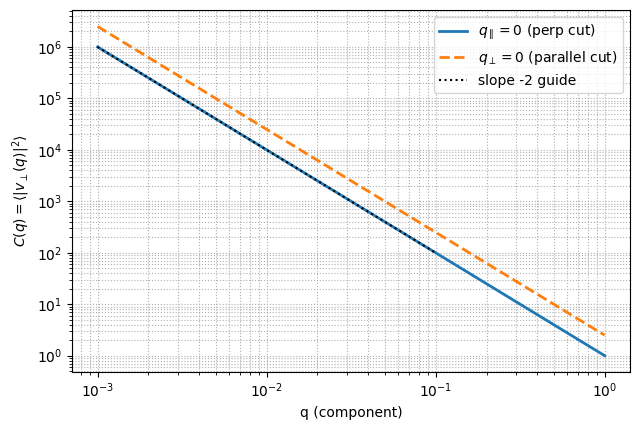

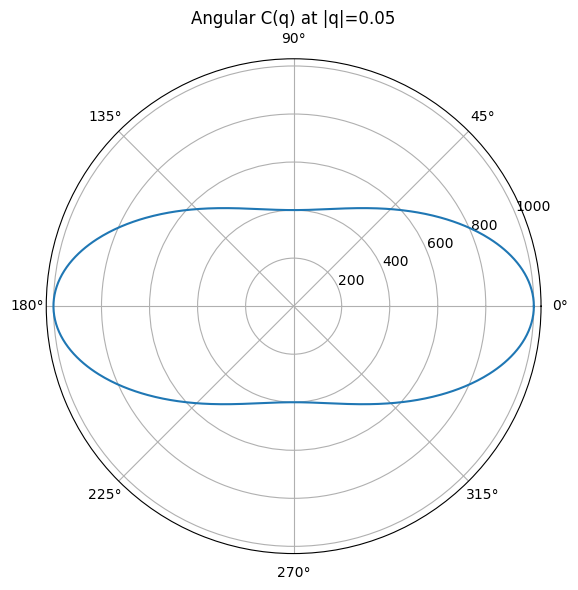

In [7]:
# Equal-time spectrum (scalar trace) and polar angular map
import numpy as np
import matplotlib.pyplot as plt

Delta = 1.0
Dperp = 1.0
Dpar  = 0.4

# log-log cuts
q = np.logspace(-3, 0, 400)
C_perp = Delta / (Dperp * q**2 + Dpar * 0.0)
C_par  = Delta / (Dperp * 0.0 + Dpar * q**2)

plt.figure(figsize=(6.5,4.4))
plt.loglog(q, C_perp, lw=2, label=r'$q_\parallel=0$ (perp cut)')
plt.loglog(q, C_par, '--', lw=2, label=r'$q_\perp=0$ (parallel cut)')
refq = np.array([1e-3,1e-2,1e-1])
ref = C_perp[0]*(refq/q[0])**(-2)
plt.loglog(refq, ref, ':k', label='slope -2 guide')
plt.xlabel('q (component)'); plt.ylabel(r'$C(q)=\langle|v_\perp(q)|^2\rangle$')
plt.legend(); plt.grid(True, which='both', ls=':')
plt.tight_layout(); plt.show()

# angular polar plot
q0 = 0.05
thetas = np.linspace(0,2*np.pi,720)
qpar = q0*np.cos(thetas); qper = q0*np.sin(thetas)
Ctheta = Delta / (Dperp * qper**2 + Dpar * qpar**2 + 1e-30)
plt.figure(figsize=(6,6)); plt.polar(thetas, Ctheta); plt.title(f'Angular C(q) at |q|={q0}')
plt.tight_layout(); plt.show()


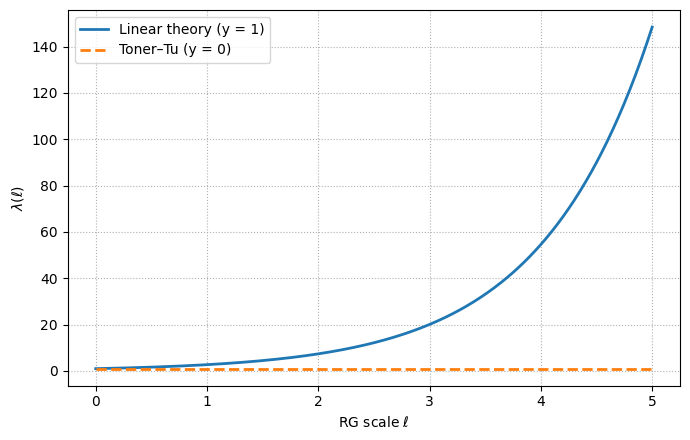

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- Exponents ---

# Toner–Tu (2D) exponents
z_TT = 6/5         # = 1.2
chi_TT = -1/5      # = -0.2

# Linear (Gaussian) hydrodynamics in 2D
z_lin = 2.0
chi_lin = 0.0

# --- RG scale ---
ell = np.linspace(0, 5, 400)

# --- Initial lambda ---
lambda0 = 1.0

# Recursion exponent y_lambda = chi + z - 1
y_lambda_TT = chi_TT + z_TT - 1
y_lambda_lin = chi_lin + z_lin - 1

# RG evolution
lambda_TT  = lambda0 * np.exp(y_lambda_TT * ell)
lambda_lin = lambda0 * np.exp(y_lambda_lin * ell)

# --- Plot ---
plt.figure(figsize=(7,4.5))

plt.plot(ell, lambda_lin, label='Linear theory (y = 1)', lw=2)
plt.plot(ell, lambda_TT, '--', label='Toner–Tu (y = 0)', lw=2)

plt.xlabel(r'RG scale $\ell$')
plt.ylabel(r'$\lambda(\ell)$')
plt.grid(True, ls=':')
plt.legend()

plt.tight_layout()
plt.savefig("lambda l")
plt.show()
